## **CNN ARCHITECTURES on MNIST**

In [24]:
#Using Tensor flow version 2.0
#%tensorflow_version 2.x
#import tensorflow as tf
#from tensorflow import keras
#print(tf.__version__)

TensorFlow is already loaded. Please restart the runtime to change versions.
1.14.0


In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

1.15.0


In [0]:
#DEGRADING TO LOWER VERSION
#!pip install tensorflow==1.14.0
#import tensorflow as tf
#print(tf.__version__)

**STEP 1: LOADING THE DATA**

In [3]:
#https://www.tensorflow.org/tutorials/keras/classification
m  = keras.datasets.mnist                                                 #Import and load the MNIST data directly from TensorFlow
(train_images, train_labels), (test_images, test_labels) = m.load_data()  #Dividing data into two parts train and test.Loading the dataset returns four NumPy arrays
print("DATASET LOADED SUCCESSFULLY")

11493376/11490434 [==============================] - 0s 0us/step
DATASET LOADED SUCCESSFULLY


**STEP 2 : EXPLORING THE DATA**

In [4]:
#Shape of Train and test datapoints
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print("number of data points in train_images : ", train_images.shape[0],"number of pixels in each train image :",train_images.shape[1])
print("number of data points in test_images : ", test_images.shape[0],"number of pixels in each test image :",test_images.shape[1])

number of data points in train_images :  60000 number of pixels in each train image : 28
number of data points in test_images :  10000 number of pixels in each test image : 28


**There are 60000 Train datapoints and 10000 test datapoints with 28x28 size.**

**STEP 3 : PREPROCESSING THE DATA**

In [0]:
# convert class vectors to binary class matrices
num_classes=10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [7]:
print(type(train_labels))
print(train_labels[0])

<class 'numpy.ndarray'>
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


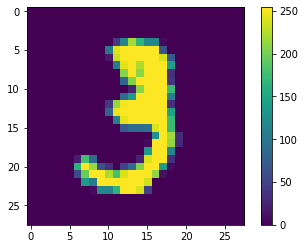

In [8]:
#Printing first image
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
# input image dimensions
from keras import backend as K
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
    test_images = test_images.reshape(test_images[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
    test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Using TensorFlow backend.


In [11]:
print(type(input_shape))
print(input_shape)

<class 'tuple'>
(28, 28, 1)


**STEP 4 : Buliding the model**

**ARCHITECTURE 1 :CONV + CONV + CONV + MAX POOLING + FLATTEN + DENSE**

**(A) SETUP THE LAYERS:**

In [0]:
#importing required libraries

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(num_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**(B) COMPILE THE MODEL:**
1. Optimizer
2. Loss function
3. Evaluation Metrics

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adadelta',
              metrics=['accuracy'])

**STEP 5 : TRAINING THE MODEL**

In [0]:
batch_size = 128
num_classes = 10
epochs = 12




Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 329s 5ms/step - loss: 0.2661 - acc: 0.9175 - val_loss: 0.0460 - val_acc: 0.9852
Epoch 2/12
60000/60000 [==============================] - 326s 5ms/step - loss: 0.0838 - acc: 0.9758 - val_loss: 0.0410 - val_acc: 0.9859
Epoch 3/12
60000/60000 [==============================] - 325s 5ms/step - loss: 0.0599 - acc: 0.9825 - val_loss: 0.0340 - val_acc: 0.9880
Epoch 4/12
60000/60000 [==============================] - 329s 5ms/step - loss: 0.0496 - acc: 0.9854 - val_loss: 0.0322 - val_acc: 0.9901
Epoch 5/12
60000/60000 [==============================] - 330s 5ms/step - loss: 0.0433 - acc: 0.9871 - val_loss: 0.0289 - val_acc: 0.9904
Epoch 6/12
60000/60000 [==============================] - 323s 5ms/step - loss: 0.0395 - acc: 0.9882 - val_loss: 0.0270 - val_acc: 0.9910
Epoch 7/12
60000/60000 [==============================] - 322s 5ms/step - loss: 0.0341 - acc: 0.9900 - val_loss: 0

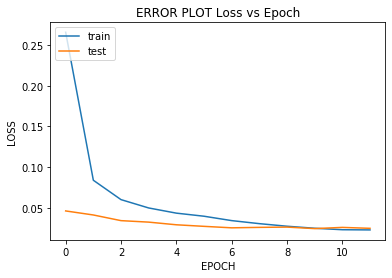

In [16]:
history = model.fit(train_images, train_labels, epochs=epochs,batch_size=batch_size,validation_split=0.25,validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ERROR PLOT Loss vs Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
train_acc1 = history.history['acc']
cross_acc1 = history.history['val_acc']
train_loss1 = history.history['loss']
cross_loss1 = history.history['val_loss']

**ARCHITECTURE 2 :CONV + CONV + MAX POOLING + CONV + CONV + CONV + MAX POOLING + FLATTEN + DENSE**

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 181s 3ms/step - loss: 0.6687 - acc: 0.7758 - val_loss: 0.1180 - val_acc: 0.9613
Epoch 2/10
60000/60000 [==============================] - 182s 3ms/step - loss: 0.1870 - acc: 0.9438 - val_loss: 0.0731 - val_acc: 0.9760
Epoch 3/10
60000/60000 [==============================] - 181s 3ms/step - loss: 0.1323 - acc: 0.9598 - val_loss: 0.0554 - val_acc: 0.9829
Epoch 4/10
60000/60000 [==============================] - 181s 3ms/step - loss: 0.1095 - acc: 0.9671 - val_loss: 0.0497 - val_acc: 0.9846
Epoch 5/10
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0934 - acc: 0.9721 - val_loss: 0.0455 - val_acc: 0.9862
Epoch 6/10
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0832 - acc: 0.9752 - val_loss: 0.0382 - val_acc: 0.9874
Epoch 7/10
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0714 - acc: 0.9784 - val_loss: 0.0377 - 

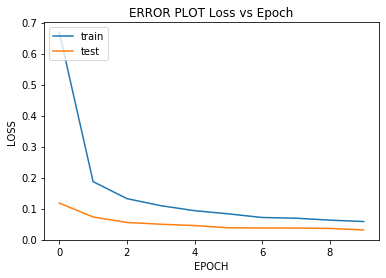

In [24]:
batch_size = 256
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Dropout(rate = 0.25))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=epochs,batch_size=batch_size,validation_split=0.25,validation_data=(test_images, test_labels))

test_loss2, test_acc2 = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy2:', test_acc)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ERROR PLOT Loss vs Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

train_acc2 = history.history['acc']
cross_acc2 = history.history['val_acc']
train_loss2 = history.history['loss']
cross_loss2 = history.history['val_loss']

**ARCHITECTURE 3 : CONV + CONV + MAX POOLING + CONV + CONV + MAX POOLING + CONV + CONV + CONV + MAX POOLING + FLATTEN + DENSE**

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 209s 3ms/step - loss: 0.9074 - acc: 0.6858 - val_loss: 0.1990 - val_acc: 0.9404
Epoch 2/10
60000/60000 [==============================] - 208s 3ms/step - loss: 0.2399 - acc: 0.9361 - val_loss: 0.1217 - val_acc: 0.9657
Epoch 3/10
60000/60000 [==============================] - 208s 3ms/step - loss: 0.1598 - acc: 0.9596 - val_loss: 0.0882 - val_acc: 0.9737
Epoch 4/10
60000/60000 [==============================] - 207s 3ms/step - loss: 0.1197 - acc: 0.9704 - val_loss: 0.0809 - val_acc: 0.9771
Epoch 5/10
60000/60000 [==============================] - 210s 4ms/step - loss: 0.1021 - acc: 0.9738 - val_loss: 0.0706 - val_acc: 0.9788
Epoch 6/10
60000/60000 [==============================] - 209s 3ms/step - loss: 0.0844 - acc: 0.9783 - val_loss: 0.0620 - val_acc: 0.9827
Epoch 7/10
60000/60000 [==============================] - 210s 3ms/step - loss: 0.0763 - acc: 0.9801 - val_loss: 0.0597 - 

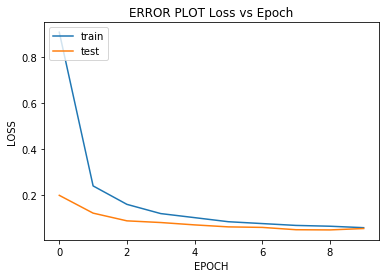

In [26]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (1,1), activation='relu'))
model.add(Conv2D(8, (1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=epochs,batch_size=batch_size,validation_split=0.25,validation_data=(test_images, test_labels))

test_loss3, test_acc3 = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy3:', test_acc3)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ERROR PLOT Loss vs Epoch')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

train_acc3 = history.history['acc']
cross_acc3 = history.history['val_acc']
train_loss3 = history.history['loss']
cross_loss3 = history.history['val_loss']

In [30]:
# Please compare all your models using Prettytable library
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["ARCHITECTURE", "train_loss","train_acc","cv_loss" ,"cv_acc","test_loss","test_acc"]

x.add_row(["1",train_loss1[11],train_acc1[11],cross_loss1[11],cross_acc1[11],test_loss,test_acc])
x.add_row(["2",train_loss2[9],train_acc2[9],cross_loss2[9],cross_acc2[9],test_loss2,test_acc2])
x.add_row(["3",train_loss3[9],train_acc3[9],cross_loss3[9],cross_acc3[9],test_loss3,test_acc3])
print(x)

+--------------+----------------------+--------------------+----------------------+--------+----------------------+----------+
| ARCHITECTURE |      train_loss      |     train_acc      |       cv_loss        | cv_acc |      test_loss       | test_acc |
+--------------+----------------------+--------------------+----------------------+--------+----------------------+----------+
|      1       | 0.022590210125222804 | 0.9930499999682109 | 0.02455080679274688  | 0.9924 | 0.024550808396359754 |  0.9924  |
|      2       | 0.058461320312817894 | 0.9823666666984558 | 0.03139860126348212  |  0.99  | 0.03139860348273651  |   0.99   |
|      3       | 0.05848852526942889  | 0.9848499999682109 | 0.054851686122082174 | 0.9845 | 0.05485169101881693  |  0.9845  |
+--------------+----------------------+--------------------+----------------------+--------+----------------------+----------+
